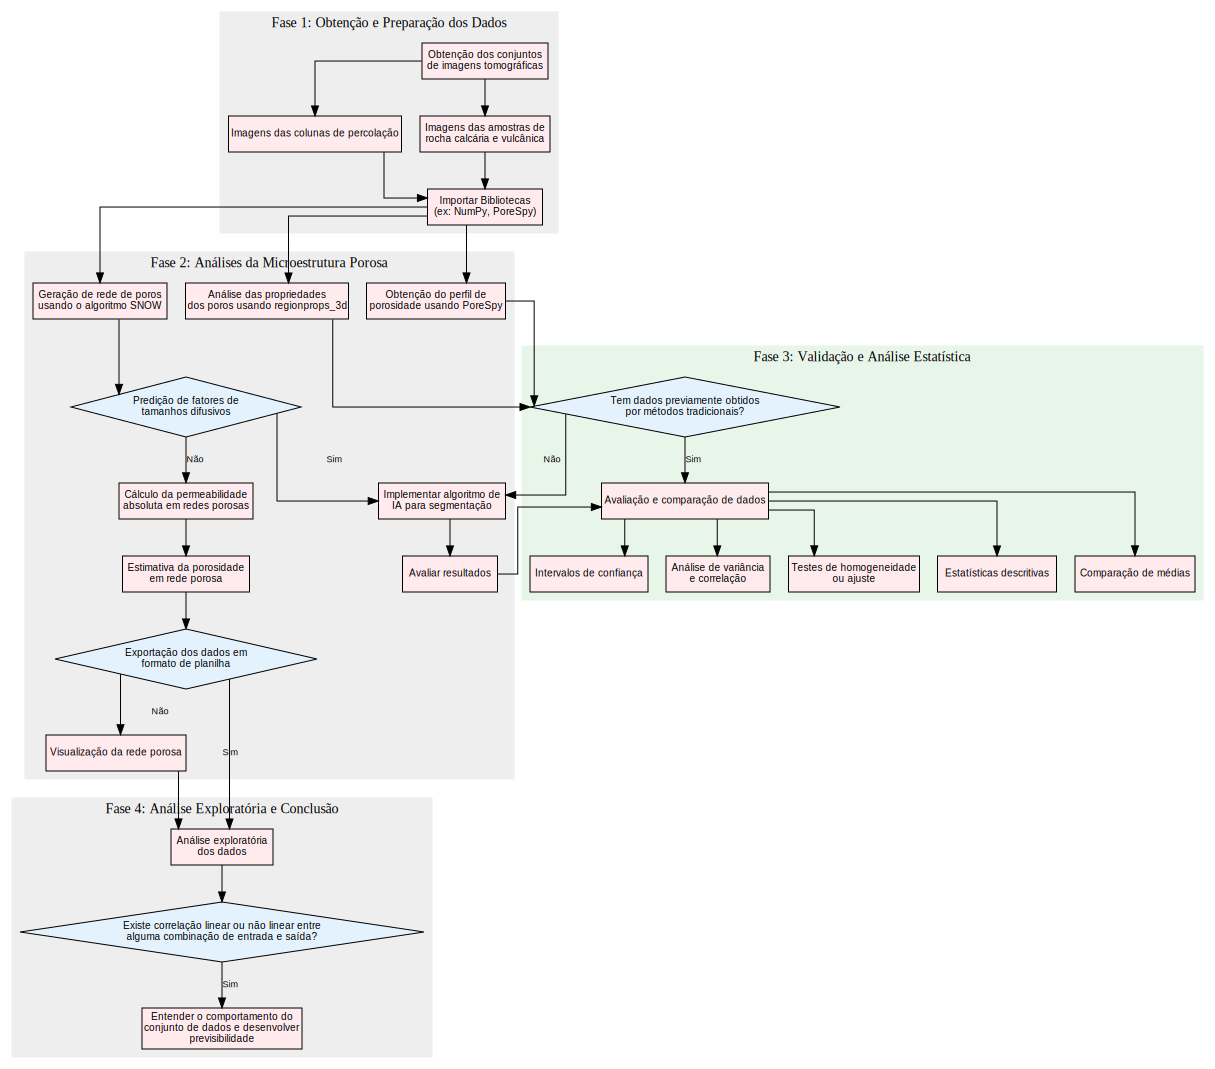

In [4]:
# ==============================================================================
# SCRIPT PARA GERAR O FLUXOGRAMA DA PESQUISA USANDO GRAPHVIZ
# "Diagrama como Código"
# ==============================================================================

# Passo 1: Instalar a biblioteca Graphviz no ambiente do Colab
!pip install graphviz -q

import graphviz

# Passo 2: Criar o objeto do fluxograma (um "Digraph" ou Gráfico Direcionado)
# 'TB' significa que o layout será de cima para baixo (Top to Bottom)
dot = graphviz.Digraph(comment='Fluxograma da Pesquisa de Análise Tomográfica')
dot.attr(rankdir='TB', splines='ortho', concentrate='true')

# --- CONFIGURAÇÕES GLOBAIS DE ESTILO ---
# Definindo cores e formas padrão para os nós (caixas e losangos)
dot.attr('node', style='filled', fontname='Helvetica', fontsize='10')
dot.attr('edge', fontname='Helvetica', fontsize='9')

# Cor rosa para processos (similar ao original)
cor_processo = '#FFEBEE'
# Cor azul para decisões (similar ao original)
cor_decisao = '#E3F2FD'
# Cor verde para o grupo de comparação
cor_comparacao = '#E8F5E9'

# --- NÓS E ESTRUTURA DO FLUXOGRAMA ---

# Usamos 'subgraph' com o prefixo 'cluster_' para criar caixas visuais
# que agrupam os nós relacionados.

# Grupo 1: Entrada de Dados
with dot.subgraph(name='cluster_entrada') as c:
    c.attr(label='Fase 1: Obtenção e Preparação dos Dados', style='filled', color='#EEEEEE')
    c.node('obter_imagens', 'Obtenção dos conjuntos\nde imagens tomográficas', shape='box', fillcolor=cor_processo)
    c.node('imagens_colunas', 'Imagens das colunas de percolação', shape='box', fillcolor=cor_processo)
    c.node('imagens_rochas', 'Imagens das amostras de\nrocha calcária e vulcânica', shape='box', fillcolor=cor_processo)
    c.node('importar_libs', 'Importar Bibliotecas\n(ex: NumPy, PoreSpy)', shape='box', fillcolor=cor_processo)

# Grupo 2: Análises Centrais e Paralelas
with dot.subgraph(name='cluster_analise') as c:
    c.attr(label='Fase 2: Análises da Microestrutura Porosa', style='filled', color='#EEEEEE')
    # Caminho A
    c.node('perfil_porespy', 'Obtenção do perfil de\nporosidade usando PoreSpy', shape='box', fillcolor=cor_processo)
    # Caminho B
    c.node('props_regionprops', 'Análise das propriedades\ndos poros usando regionprops_3d', shape='box', fillcolor=cor_processo)
    # Caminho C (SNOW)
    c.node('gerar_rede_snow', 'Geração de rede de poros\nusando o algoritmo SNOW', shape='box', fillcolor=cor_processo)
    c.node('predicao_difusivos', 'Predição de fatores de\ntamanhos difusivos', shape='diamond', fillcolor=cor_decisao)
    c.node('calc_permeabilidade', 'Cálculo da permeabilidade\nabsoluta em redes porosas', shape='box', fillcolor=cor_processo)
    c.node('estimativa_porosidade_rede', 'Estimativa da porosidade\nem rede porosa', shape='box', fillcolor=cor_processo)
    c.node('exportar_planilha', 'Exportação dos dados em\nformato de planilha', shape='diamond', fillcolor=cor_decisao)
    c.node('visualizar_rede', 'Visualização da rede porosa', shape='box', fillcolor=cor_processo)
    # Bloco de IA
    c.node('implementar_ia', 'Implementar algoritmo de\nIA para segmentação', shape='box', fillcolor=cor_processo)
    c.node('avaliar_resultados_ia', 'Avaliar resultados', shape='box', fillcolor=cor_processo)

# Grupo 3: Análise Exploratória e Final
with dot.subgraph(name='cluster_final') as c:
    c.attr(label='Fase 4: Análise Exploratória e Conclusão', style='filled', color='#EEEEEE')
    c.node('analise_exploratoria', 'Análise exploratória\ndos dados', shape='box', fillcolor=cor_processo)
    c.node('decisao_correlacao', 'Existe correlação linear ou não linear entre\nalguma combinação de entrada e saída?', shape='diamond', fillcolor=cor_decisao)
    c.node('entender_comportamento', 'Entender o comportamento do\nconjunto de dados e desenvolver\nprevisibilidade', shape='box', fillcolor=cor_processo)

# Grupo 4: Comparação com Dados Tradicionais
with dot.subgraph(name='cluster_comparacao') as c:
    c.attr(label='Fase 3: Validação e Análise Estatística', style='filled', color=cor_comparacao)
    c.node('decisao_dados_trad', 'Tem dados previamente obtidos\npor métodos tradicionais?', shape='diamond', fillcolor=cor_decisao)
    c.node('avaliacao_comparacao', 'Avaliação e comparação de dados', shape='box', fillcolor=cor_processo)
    c.node('testes_homogeneidade', 'Testes de homogeneidade\nou ajuste', shape='box', fillcolor=cor_processo)
    c.node('stats_descritivas', 'Estatísticas descritivas', shape='box', fillcolor=cor_processo)
    c.node('comparacao_medias', 'Comparação de médias', shape='box', fillcolor=cor_processo)
    c.node('intervalos_confianca', 'Intervalos de confiança', shape='box', fillcolor=cor_processo)
    c.node('analise_variancia', 'Análise de variância\ne correlação', shape='box', fillcolor=cor_processo)

# --- CONEXÕES (ARESTAS) DO FLUXOGRAMA ---

# Conexões da Fase 1
dot.edge('obter_imagens', 'imagens_colunas')
dot.edge('obter_imagens', 'imagens_rochas')
dot.edge('imagens_colunas', 'importar_libs')
dot.edge('imagens_rochas', 'importar_libs')

# Conexões para o início das análises paralelas
dot.edge('importar_libs', 'perfil_porespy')
dot.edge('importar_libs', 'props_regionprops')
dot.edge('importar_libs', 'gerar_rede_snow')

# Conexões para o bloco de decisão de dados tradicionais
dot.edge('perfil_porespy', 'decisao_dados_trad')
dot.edge('props_regionprops', 'decisao_dados_trad')
dot.edge('importar_libs', 'decisao_dados_trad', style='invis') # Aresta invisível para ajudar no layout

# Conexões da Fase 3 (Comparação)
dot.edge('decisao_dados_trad', 'avaliacao_comparacao', label='Sim')
dot.edge('avaliacao_comparacao', 'testes_homogeneidade')
dot.edge('avaliacao_comparacao', 'stats_descritivas')
dot.edge('avaliacao_comparacao', 'comparacao_medias')
dot.edge('avaliacao_comparacao', 'intervalos_confianca')
dot.edge('avaliacao_comparacao', 'analise_variancia')

# Conexão da decisão "Não" para o bloco de IA
dot.edge('decisao_dados_trad', 'implementar_ia', label='Não')

# Conexões do bloco de IA
dot.edge('implementar_ia', 'avaliar_resultados_ia')
dot.edge('avaliar_resultados_ia', 'avaliacao_comparacao')

# Conexões do Caminho C (SNOW)
dot.edge('gerar_rede_snow', 'predicao_difusivos')
dot.edge('predicao_difusivos', 'implementar_ia', label='Sim')
dot.edge('predicao_difusivos', 'calc_permeabilidade', label='Não')
dot.edge('calc_permeabilidade', 'estimativa_porosidade_rede')
dot.edge('estimativa_porosidade_rede', 'exportar_planilha')
dot.edge('exportar_planilha', 'analise_exploratoria', label='Sim')
dot.edge('exportar_planilha', 'visualizar_rede', label='Não')

# Conexões da Fase 4 (Final)
dot.edge('visualizar_rede', 'analise_exploratoria')
dot.edge('analise_exploratoria', 'decisao_correlacao')
dot.edge('decisao_correlacao', 'entender_comportamento', label='Sim')

# Passo 3: Renderizar e exibir o fluxograma
dot

In [1]:
# Instalação das bibliotecas necessárias no Google Colab
# O 'diagrams' é a biblioteca Python
# O 'graphviz' é o motor de renderização que o 'diagrams' utiliza
!pip install diagrams
!apt-get install -y graphviz

from diagrams import Diagram, Cluster
from diagrams.custom import Custom
from diagrams.generic.device import Tablet
from diagrams.generic.storage import Storage

# Define as cores personalizadas para melhor visualização
COR_DADOS = "#4CAF50" # Verde
COR_PROCESSAMENTO = "#2196F3" # Azul
COR_ANALISE = "#FFC107" # Amarelo/Âmbar
COR_RESULTADO = "#F44336" # Vermelho
COR_ML = "#9C27B0" # Roxo

# Define os caminhos dos ícones personalizados (representação simbólica)
# Embora não seja estritamente necessário no Colab, é uma boa prática
# Aqui, usaremos um ícone genérico para PoreSpy/OpenPNM

# A macro-estrutura do diagrama
with Diagram(
    name="Fluxograma da Metodologia de Caracterização de Rochas Reservatório",
    direction="TB", # Topo para Baixo (Top-Bottom)
    show=True, # Mostrar imediatamente após a execução
    filename="metodologia_caracterizacao_rocha",
    outformat="png" # Formato de saída para o slide
):
    # --- ETAPA 1: AQUISIÇÃO DE DADOS ---
    Aquisicao = Custom(
        "Aquisição de Imagens",
        "./icones/microct.png", # Um ícone simbólico de scanner ou dispositivo de aquisição
        color=COR_DADOS
    )
    Aquisicao.label = "Aquisição (Microtomografia de Raios X - Micro-CT)"

    # --- ETAPA 2: PRÉ-PROCESSAMENTO E SEGMENTAÇÃO ---
    with Cluster("Pré-Processamento & Segmentação", direction="LR", graph_attr={"bgcolor": "#f0f0f0"}):
        Filtro = Custom("Filtragem de Ruído", "./icones/filtro.png", color=COR_PROCESSAMENTO)
        Segmentacao = Custom("Segmentação (Poros/Matriz)", "./icones/segmentacao.png", color=COR_PROCESSAMENTO)
        Binarizacao = Custom("Binarização da Imagem", "./icones/binarizacao.png", color=COR_PROCESSAMENTO)

        # Fluxo de pré-processamento
        Filtro >> Segmentacao >> Binarizacao

    # --- ETAPA 3: EXTRAÇÃO DE PROPRIEDADES DE POROS (PORESPY) ---
    with Cluster("Análise de Poros (PoreSpy)", direction="LR", graph_attr={"bgcolor": "#fff3e0"}):
        PoreSpy_Input = Binarizacao
        PropriedadesPoros = Custom("Extração de Propriedades Morfológicas (e.g., Porosidade, Tamanho de Poros)", "./icones/porespy.png", color=COR_ANALISE)

        PoreSpy_Input >> PropriedadesPoros

    # --- ETAPA 4: MODELAGEM DE REDE DE POROS (OPENPNM) ---
    with Cluster("Modelagem da Rede de Poros (OpenPNM)", direction="LR", graph_attr={"bgcolor": "#e3f2fd"}):
        PNM_Input = PropriedadesPoros
        ExtrairRede = Custom("Extração da Rede de Poros (Pores e Gargantas)", "./icones/openpnm.png", color=COR_ANALISE)
        Simulacao = Custom("Simulação de Propriedades de Transporte (e.g., Permeabilidade)", "./icones/simulacao.png", color=COR_ANALISE)

        PNM_Input >> ExtrairRede >> Simulacao

    # --- ETAPA 5: APRENDIZAGEM DE MÁQUINA (ML) ---
    with Cluster("Aprendizagem de Máquina (ML)", direction="TB", graph_attr={"bgcolor": "#ede7f6"}):
        ML_Input = [PropriedadesPoros, Simulacao]

        Dataset = Storage("Dataset (Propriedades Morfológicas e de Transporte)")
        Treinamento = Custom("Treinamento do Modelo ML (e.g., Regressão, Classificação)", "./icones/treinamento_ml.png", color=COR_ML)
        Predicao = Custom("Predição/Caracterização Otimizada", "./icones/predicao.png", color=COR_ML)

        ML_Input >> Dataset >> Treinamento >> Predicao

    # --- ETAPA 6: RESULTADOS E VALIDAÇÃO ---
    Resultados = Tablet("Resultados Finais e Validação", color=COR_RESULTADO)

    # --- CONECTANDO O FLUXO PRINCIPAL ---
    # Aquisição -> Pré-Processamento
    Aquisicao >> Filtro

    # Saída das Etapas de Análise para o ML (Conexão já feita acima: ML_Input)

    # ML -> Resultados Finais
    Predicao >> Resultados

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.4/226.4 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 80.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 23.3 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.21
    Uninstalling graphviz-0.21:
      Successfully uninstalled graphviz-0.21
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


Gerando o diagrama...


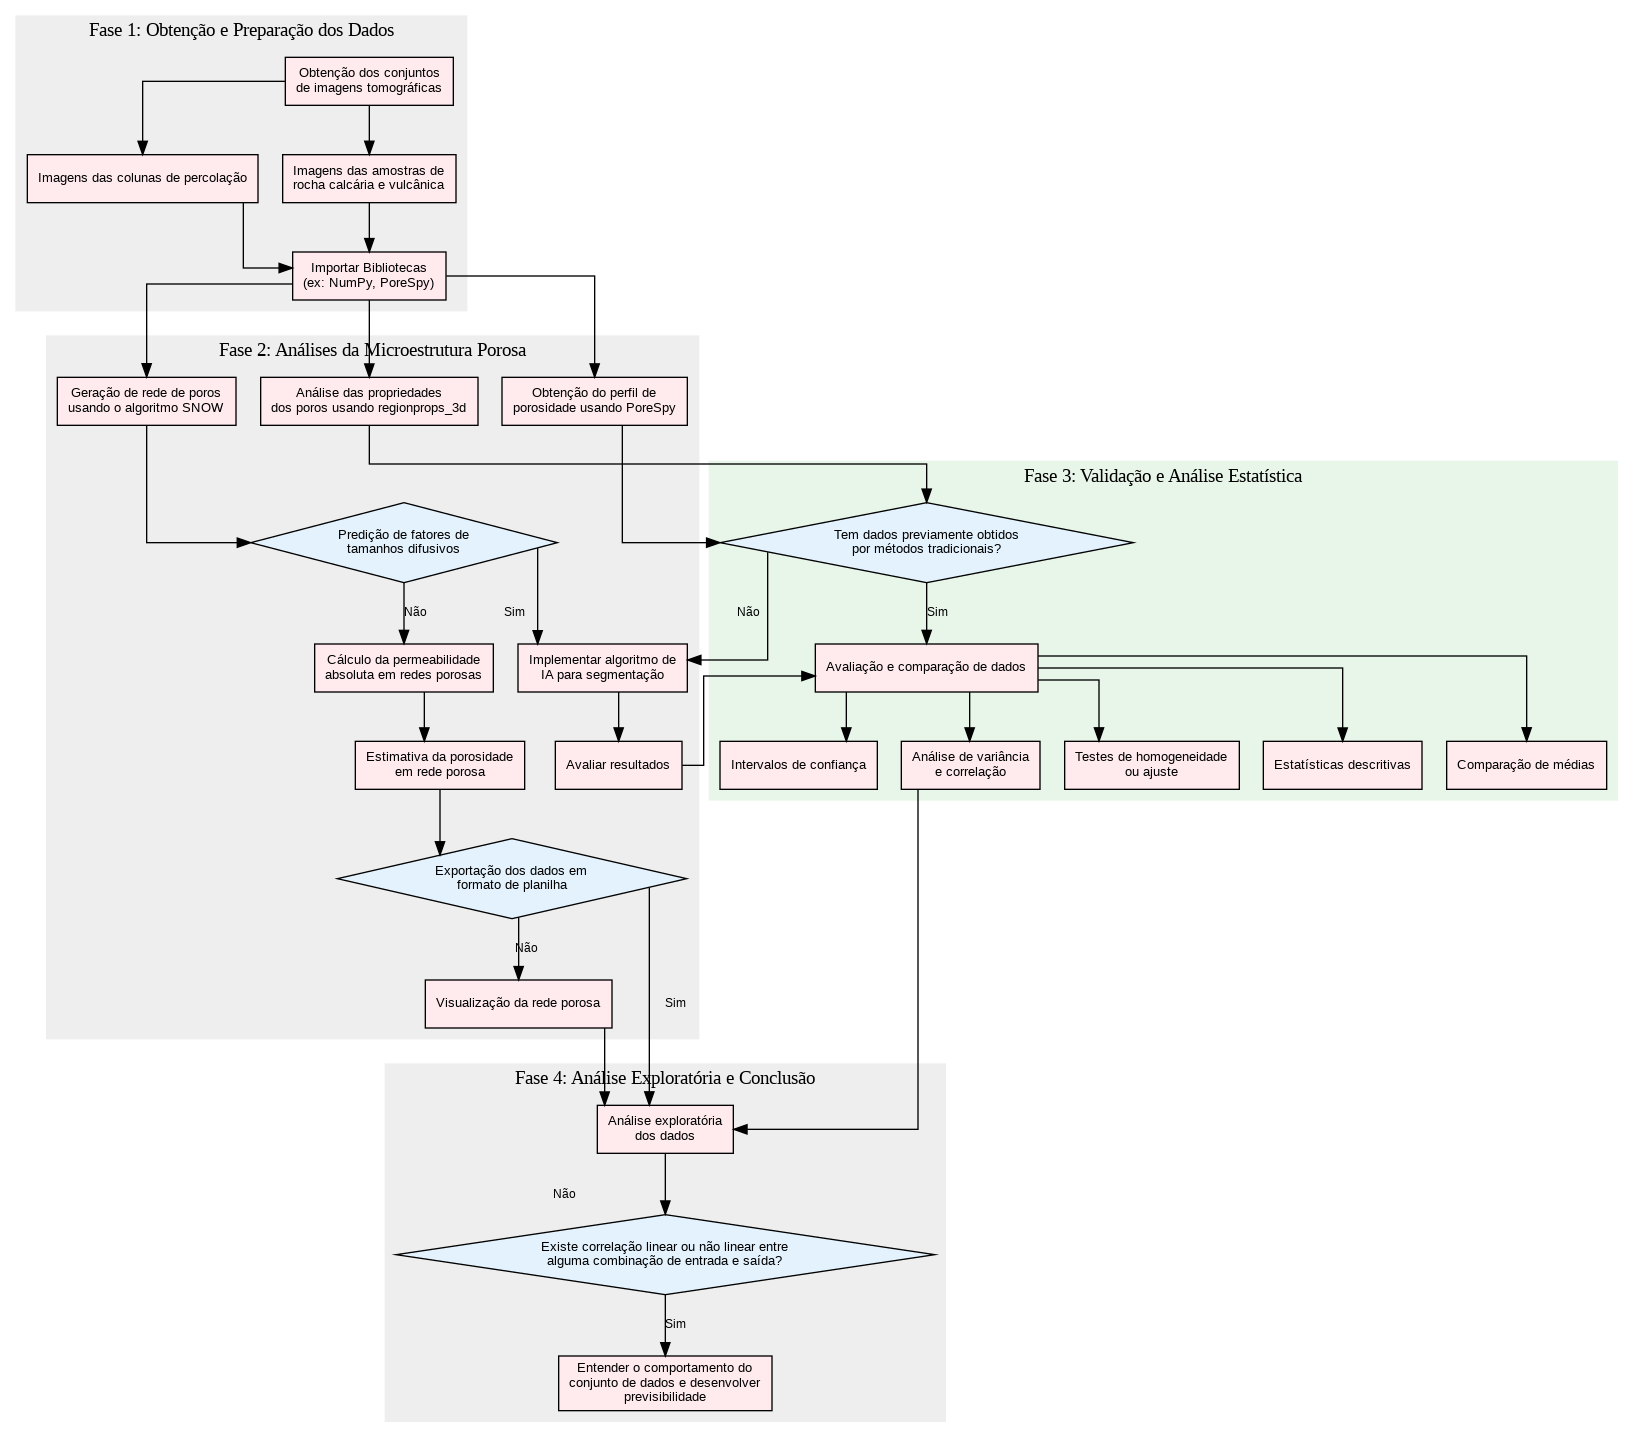


Iniciando download automático...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
# ==============================================================================
# SCRIPT PARA GERAR E BAIXAR O FLUXOGRAMA (AUTOMÁTICO)
# ==============================================================================

# Passo 1: Instalação e Importação das Bibliotecas
!pip install graphviz -q

import graphviz
import os
from IPython.display import display, Image
from google.colab import files  # Biblioteca específica para download no Colab

# Configuração do Arquivo
nome_arquivo = 'fluxograma_metodologia_dissertacao'

# Passo 2: Construção do Diagrama
dot = graphviz.Digraph(
    comment='Fluxograma da Pesquisa de Análise Tomográfica',
    format='png',
    filename=nome_arquivo
)

# Layout e Estilo (Ortogonal e Hierárquico)
dot.attr(rankdir='TB', splines='ortho', concentrate='true')
dot.attr('node', style='filled', fontname='Helvetica', fontsize='10')
dot.attr('edge', fontname='Helvetica', fontsize='9')

# Paleta de Cores (Suave para Slide Acadêmico)
cor_processo = '#FFEBEE'      # Rosa claro
cor_decisao = '#E3F2FD'       # Azul claro
cor_comparacao = '#E8F5E9'    # Verde claro
cor_cluster = '#EEEEEE'       # Cinza claro

# --- ESTRUTURA DOS CLUSTERS (FASES) ---

# Fase 1: Entrada
with dot.subgraph(name='cluster_entrada') as c:
    c.attr(label='Fase 1: Obtenção e Preparação dos Dados', style='filled', color=cor_cluster)
    c.node('obter_imagens', 'Obtenção dos conjuntos\nde imagens tomográficas', shape='box', fillcolor=cor_processo)
    c.node('imagens_colunas', 'Imagens das colunas de percolação', shape='box', fillcolor=cor_processo)
    c.node('imagens_rochas', 'Imagens das amostras de\nrocha calcária e vulcânica', shape='box', fillcolor=cor_processo)
    c.node('importar_libs', 'Importar Bibliotecas\n(ex: NumPy, PoreSpy)', shape='box', fillcolor=cor_processo)

# Fase 2: Análises
with dot.subgraph(name='cluster_analise') as c:
    c.attr(label='Fase 2: Análises da Microestrutura Porosa', style='filled', color=cor_cluster)
    c.node('perfil_porespy', 'Obtenção do perfil de\nporosidade usando PoreSpy', shape='box', fillcolor=cor_processo)
    c.node('props_regionprops', 'Análise das propriedades\ndos poros usando regionprops_3d', shape='box', fillcolor=cor_processo)
    c.node('gerar_rede_snow', 'Geração de rede de poros\nusando o algoritmo SNOW', shape='box', fillcolor=cor_processo)
    c.node('predicao_difusivos', 'Predição de fatores de\ntamanhos difusivos', shape='diamond', fillcolor=cor_decisao)
    c.node('calc_permeabilidade', 'Cálculo da permeabilidade\nabsoluta em redes porosas', shape='box', fillcolor=cor_processo)
    c.node('estimativa_porosidade_rede', 'Estimativa da porosidade\nem rede porosa', shape='box', fillcolor=cor_processo)
    c.node('exportar_planilha', 'Exportação dos dados em\nformato de planilha', shape='diamond', fillcolor=cor_decisao)
    c.node('visualizar_rede', 'Visualização da rede porosa', shape='box', fillcolor=cor_processo)
    c.node('implementar_ia', 'Implementar algoritmo de\nIA para segmentação', shape='box', fillcolor=cor_processo)
    c.node('avaliar_resultados_ia', 'Avaliar resultados', shape='box', fillcolor=cor_processo)

# Fase 3: Validação
with dot.subgraph(name='cluster_comparacao') as c:
    c.attr(label='Fase 3: Validação e Análise Estatística', style='filled', color=cor_comparacao)
    c.node('decisao_dados_trad', 'Tem dados previamente obtidos\npor métodos tradicionais?', shape='diamond', fillcolor=cor_decisao)
    c.node('avaliacao_comparacao', 'Avaliação e comparação de dados', shape='box', fillcolor=cor_processo)
    c.node('testes_homogeneidade', 'Testes de homogeneidade\nou ajuste', shape='box', fillcolor=cor_processo)
    c.node('stats_descritivas', 'Estatísticas descritivas', shape='box', fillcolor=cor_processo)
    c.node('comparacao_medias', 'Comparação de médias', shape='box', fillcolor=cor_processo)
    c.node('intervalos_confianca', 'Intervalos de confiança', shape='box', fillcolor=cor_processo)
    c.node('analise_variancia', 'Análise de variância\ne correlação', shape='box', fillcolor=cor_processo)

# Fase 4: Conclusão
with dot.subgraph(name='cluster_final') as c:
    c.attr(label='Fase 4: Análise Exploratória e Conclusão', style='filled', color=cor_cluster)
    c.node('analise_exploratoria', 'Análise exploratória\ndos dados', shape='box', fillcolor=cor_processo)
    c.node('decisao_correlacao', 'Existe correlação linear ou não linear entre\nalguma combinação de entrada e saída?', shape='diamond', fillcolor=cor_decisao)
    c.node('entender_comportamento', 'Entender o comportamento do\nconjunto de dados e desenvolver\nprevisibilidade', shape='box', fillcolor=cor_processo)

# --- CONEXÕES ---
# (Mantendo a lógica exata do seu fluxo original)
dot.edge('obter_imagens', 'imagens_colunas')
dot.edge('obter_imagens', 'imagens_rochas')
dot.edge('imagens_colunas', 'importar_libs')
dot.edge('imagens_rochas', 'importar_libs')
dot.edge('importar_libs', 'perfil_porespy')
dot.edge('importar_libs', 'props_regionprops')
dot.edge('importar_libs', 'gerar_rede_snow')
dot.edge('perfil_porespy', 'decisao_dados_trad')
dot.edge('props_regionprops', 'decisao_dados_trad')
dot.edge('decisao_dados_trad', 'avaliacao_comparacao', label='Sim')
dot.edge('avaliacao_comparacao', 'testes_homogeneidade')
dot.edge('avaliacao_comparacao', 'stats_descritivas')
dot.edge('avaliacao_comparacao', 'comparacao_medias')
dot.edge('avaliacao_comparacao', 'intervalos_confianca')
dot.edge('avaliacao_comparacao', 'analise_variancia')
dot.edge('decisao_dados_trad', 'implementar_ia', label='Não')
dot.edge('implementar_ia', 'avaliar_resultados_ia')
dot.edge('avaliar_resultados_ia', 'avaliacao_comparacao')
dot.edge('gerar_rede_snow', 'predicao_difusivos')
dot.edge('predicao_difusivos', 'implementar_ia', label='Sim')
dot.edge('predicao_difusivos', 'calc_permeabilidade', label='Não')
dot.edge('calc_permeabilidade', 'estimativa_porosidade_rede')
dot.edge('estimativa_porosidade_rede', 'exportar_planilha')
dot.edge('analise_variancia', 'analise_exploratoria')
dot.edge('exportar_planilha', 'analise_exploratoria', label='Sim')
dot.edge('exportar_planilha', 'visualizar_rede', label='Não')
dot.edge('visualizar_rede', 'analise_exploratoria')
dot.edge('analise_exploratoria', 'decisao_correlacao')
dot.edge('decisao_correlacao', 'entender_comportamento', label='Sim')
dot.edge('decisao_correlacao', 'analise_exploratoria', label='Não', style='dashed')

# Passo 3: Renderizar e Exibir
print("Gerando o diagrama...")
dot.render(view=False)
display(Image(filename=f'{nome_arquivo}.png'))

# Passo 4: Download Automático
print("\nIniciando download automático...")
try:
    files.download(f'{nome_arquivo}.png')
except Exception as e:
    print(f"Erro ao tentar baixar automaticamente: {e}")

In [5]:
# ==============================================================================
# SCRIPT PARA GERAR O FLUXOGRAMA DA PESQUISA (600 DPI + DOWNLOAD)
# ==============================================================================

# Passo 1: Instalação e Importação
try:
    import graphviz
except ImportError:
    !pip install graphviz -q
    import graphviz

from google.colab import files # Biblioteca necessária para o download automático

# Passo 2: Criar o objeto do fluxograma
dot = graphviz.Digraph(comment='Fluxograma da Pesquisa de Análise Tomográfica')
dot.attr(rankdir='TB', splines='ortho', concentrate='true')

# --- CONFIGURAÇÃO CRUCIAL PARA ALTA DEFINIÇÃO ---
# Define a resolução para 600 DPI
dot.attr(dpi='600')

# --- CONFIGURAÇÕES GLOBAIS DE ESTILO ---
dot.attr('node', style='filled', fontname='Helvetica', fontsize='10')
dot.attr('edge', fontname='Helvetica', fontsize='9')

# Definição de Cores
cor_processo = '#FFEBEE'
cor_decisao = '#E3F2FD'
cor_comparacao = '#E8F5E9'

# --- NÓS E ESTRUTURA DO FLUXOGRAMA ---

# Grupo 1: Entrada de Dados
with dot.subgraph(name='cluster_entrada') as c:
    c.attr(label='Fase 1: Obtenção e Preparação dos Dados', style='filled', color='#EEEEEE')
    c.node('obter_imagens', 'Obtenção dos conjuntos\nde imagens tomográficas', shape='box', fillcolor=cor_processo)
    c.node('imagens_colunas', 'Imagens das colunas de percolação', shape='box', fillcolor=cor_processo)
    c.node('imagens_rochas', 'Imagens das amostras de\nrocha calcária e vulcânica', shape='box', fillcolor=cor_processo)
    c.node('importar_libs', 'Importar Bibliotecas\n(ex: NumPy, PoreSpy)', shape='box', fillcolor=cor_processo)

# Grupo 2: Análises Centrais e Paralelas
with dot.subgraph(name='cluster_analise') as c:
    c.attr(label='Fase 2: Análises da Microestrutura Porosa', style='filled', color='#EEEEEE')
    # Caminho A
    c.node('perfil_porespy', 'Obtenção do perfil de\nporosidade usando PoreSpy', shape='box', fillcolor=cor_processo)
    # Caminho B
    c.node('props_regionprops', 'Análise das propriedades\ndos poros usando regionprops_3d', shape='box', fillcolor=cor_processo)
    # Caminho C (SNOW)
    c.node('gerar_rede_snow', 'Geração de rede de poros\nusando o algoritmo SNOW', shape='box', fillcolor=cor_processo)
    c.node('predicao_difusivos', 'Predição de fatores de\ntamanhos difusivos', shape='diamond', fillcolor=cor_decisao)
    c.node('calc_permeabilidade', 'Cálculo da permeabilidade\nabsoluta em redes porosas', shape='box', fillcolor=cor_processo)
    c.node('estimativa_porosidade_rede', 'Estimativa da porosidade\nem rede porosa', shape='box', fillcolor=cor_processo)
    c.node('exportar_planilha', 'Exportação dos dados em\nformato de planilha', shape='diamond', fillcolor=cor_decisao)
    c.node('visualizar_rede', 'Visualização da rede porosa', shape='box', fillcolor=cor_processo)
    # Bloco de IA
    c.node('implementar_ia', 'Implementar algoritmo de\nIA para segmentação', shape='box', fillcolor=cor_processo)
    c.node('avaliar_resultados_ia', 'Avaliar resultados', shape='box', fillcolor=cor_processo)

# Grupo 3: Análise Exploratória e Final
with dot.subgraph(name='cluster_final') as c:
    c.attr(label='Fase 4: Análise Exploratória e Conclusão', style='filled', color='#EEEEEE')
    c.node('analise_exploratoria', 'Análise exploratória\ndos dados', shape='box', fillcolor=cor_processo)
    c.node('decisao_correlacao', 'Existe correlação linear ou não linear entre\nalguma combinação de entrada e saída?', shape='diamond', fillcolor=cor_decisao)
    c.node('entender_comportamento', 'Entender o comportamento do\nconjunto de dados e desenvolver\nprevisibilidade', shape='box', fillcolor=cor_processo)

# Grupo 4: Comparação com Dados Tradicionais
with dot.subgraph(name='cluster_comparacao') as c:
    c.attr(label='Fase 3: Validação e Análise Estatística', style='filled', color=cor_comparacao)
    c.node('decisao_dados_trad', 'Tem dados previamente obtidos\npor métodos tradicionais?', shape='diamond', fillcolor=cor_decisao)
    c.node('avaliacao_comparacao', 'Avaliação e comparação de dados', shape='box', fillcolor=cor_processo)
    c.node('testes_homogeneidade', 'Testes de homogeneidade\nou ajuste', shape='box', fillcolor=cor_processo)
    c.node('stats_descritivas', 'Estatísticas descritivas', shape='box', fillcolor=cor_processo)
    c.node('comparacao_medias', 'Comparação de médias', shape='box', fillcolor=cor_processo)
    c.node('intervalos_confianca', 'Intervalos de confiança', shape='box', fillcolor=cor_processo)
    c.node('analise_variancia', 'Análise de variância\ne correlação', shape='box', fillcolor=cor_processo)

# --- CONEXÕES (ARESTAS) DO FLUXOGRAMA ---

# Conexões da Fase 1
dot.edge('obter_imagens', 'imagens_colunas')
dot.edge('obter_imagens', 'imagens_rochas')
dot.edge('imagens_colunas', 'importar_libs')
dot.edge('imagens_rochas', 'importar_libs')

# Conexões para o início das análises paralelas
dot.edge('importar_libs', 'perfil_porespy')
dot.edge('importar_libs', 'props_regionprops')
dot.edge('importar_libs', 'gerar_rede_snow')

# Conexões para o bloco de decisão
dot.edge('perfil_porespy', 'decisao_dados_trad')
dot.edge('props_regionprops', 'decisao_dados_trad')
dot.edge('importar_libs', 'decisao_dados_trad', style='invis')

# Conexões da Fase 3 (Comparação)
dot.edge('decisao_dados_trad', 'avaliacao_comparacao', label='Sim')
dot.edge('avaliacao_comparacao', 'testes_homogeneidade')
dot.edge('avaliacao_comparacao', 'stats_descritivas')
dot.edge('avaliacao_comparacao', 'comparacao_medias')
dot.edge('avaliacao_comparacao', 'intervalos_confianca')
dot.edge('avaliacao_comparacao', 'analise_variancia')

# Conexão da decisão "Não" para o bloco de IA
dot.edge('decisao_dados_trad', 'implementar_ia', label='Não')

# Conexões do bloco de IA
dot.edge('implementar_ia', 'avaliar_resultados_ia')
dot.edge('avaliar_resultados_ia', 'avaliacao_comparacao')

# Conexões do Caminho C (SNOW)
dot.edge('gerar_rede_snow', 'predicao_difusivos')
dot.edge('predicao_difusivos', 'implementar_ia', label='Sim')
dot.edge('predicao_difusivos', 'calc_permeabilidade', label='Não')
dot.edge('calc_permeabilidade', 'estimativa_porosidade_rede')
dot.edge('estimativa_porosidade_rede', 'exportar_planilha')
dot.edge('exportar_planilha', 'analise_exploratoria', label='Sim')
dot.edge('exportar_planilha', 'visualizar_rede', label='Não')

# Conexões da Fase 4 (Final)
dot.edge('visualizar_rede', 'analise_exploratoria')
dot.edge('analise_exploratoria', 'decisao_correlacao')
dot.edge('decisao_correlacao', 'entender_comportamento', label='Sim')

# Passo 3: Renderizar em arquivo e fazer download
# O formato 'png' suporta DPI. 'cleanup=True' remove o arquivo de fonte intermediário.
nome_arquivo = 'fluxograma_analise_tomografica_hd'
print("Renderizando imagem em 600 DPI... Aguarde um momento.")

# Renderiza para o disco do Colab
dot.render(nome_arquivo, format='png', cleanup=True)

# Inicia o download para o seu computador local
print("Iniciando download...")
files.download(f'{nome_arquivo}.png')

Renderizando imagem em 600 DPI... Aguarde um momento.


Iniciando download...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>